In [13]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [14]:
train_data=data[:1000]
train_target=target[:1000]

test_data=data[1000:]
test_target=target[1000:]

print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(1000, 50, 1)
(209, 50, 1)
(1000, 1)
(209, 1)


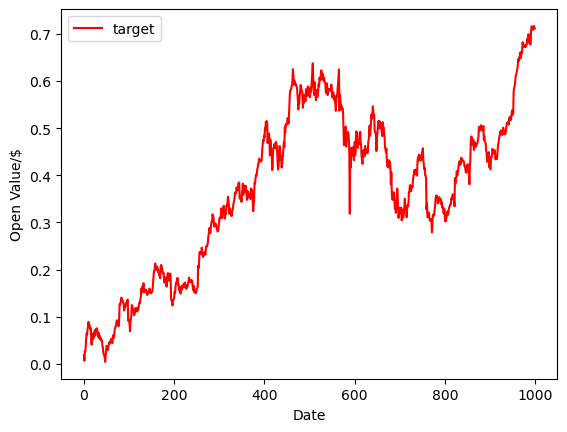

In [15]:
from matplotlib import pyplot as plt

plt.plot(train_target,'r',label='target')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

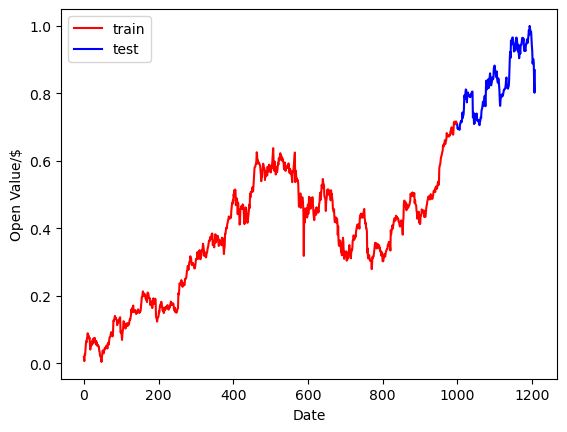

In [16]:
from matplotlib import pyplot as plt

test_x_range=np.arange(1000,1209,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [17]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

model=Sequential()

model.add(LSTM(units=96,return_sequences=True,input_shape=(50,1)))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=40,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1,activation='linear'))

model.compile(loss='mse',optimizer='adam')

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
history=model.fit(train_data,train_target,epochs=50,validation_data=(test_data,test_target))

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - loss: 0.0153 - val_loss: 0.0231
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 0.0037 - val_loss: 0.0028
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0029 - val_loss: 0.0038
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0028 - val_loss: 0.0054
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 0.0028 - val_loss: 0.0019
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 0.0025 - val_loss: 0.0051
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0027 - val_loss: 0.0035
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0023 - val_loss: 0.0015
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0021 - val_loss: 0.0028
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - loss

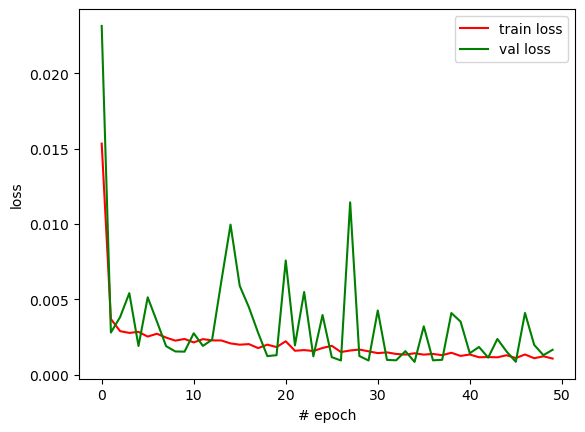

In [19]:
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [20]:
result=model.predict(test_data)

from sklearn.metrics import r2_score

r2=r2_score(test_target,result)
print('r2 score:',r2)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step
r2 score: 0.7743027327575447


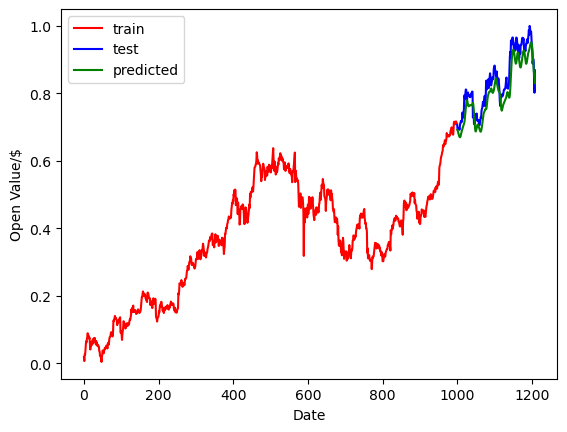

In [21]:
test_x_range=np.arange(1000,1209,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.plot(test_x_range,result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

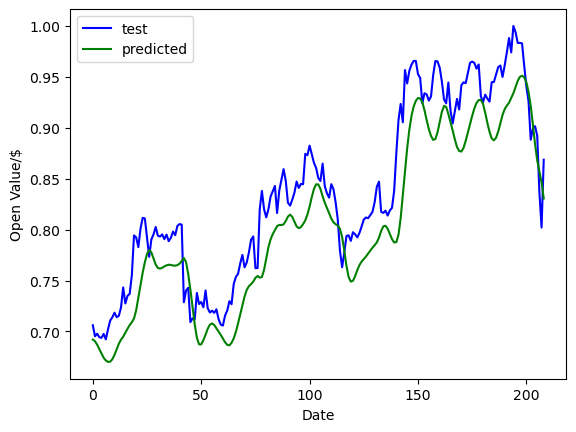

In [22]:
plt.plot(test_target,'b',label='test')
plt.plot(result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

In [23]:
model.save('LSTM-Stock-Market.model.keras')